# Estudio sobre precio de vivienda (Regresión líneal clásica).
## El proposito de este Notebook es crear y comparar un modelo de regresión líneal programado manualmente sin el uso de librerías de Machine learnning.
## Puede ser un método rústico y más exigente en términos de computación pero ofrece una mayor comprensión de como es el proceso de una regresión líneal. Ideal para un primer acercamiento

### Primero importaremos las librerías necesarias.

In [91]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

#### Esta función imprime el número de iteración, el modelo de recta con parámetros a,b y la función de perdida del modelo.

In [93]:
def Estado_iteracion(epoch, a, b, funcion_perdida):
    print('\nEpoch {}'.format(epoch))
    print('\t y = {a:0.4f}X + {b:0.4f}'.format(a=a, b=b))
    print('\tFunción de perdida = {:0.4f}'.format(funcion_perdida))

#### Esta función regresa un valor booleano de un umbral de tolerancia. Dependiendo del valor True o False que regresa la función, algo se verá modificado en las iteraciones del modelo de regresión.

In [95]:
def convergencia(a_nuevo, b_nuevo, a_viejo, b_viejo, tolerancia):
    return math.fabs(a_nuevo - a_viejo) < tolerancia and math.fabs(b_nuevo - b_viejo) < tolerancia

#### Esta es la función de regresión líneal. Itera tantas veces como datos de prueba en nuestro conjunto de datos o mientras se cumple alguna condición de umbral.

In [105]:
def regresion_lineal(X, y, alpha, n_epoch, tolerancia, verbose=False):
    a_nuevo, b_nuevo = (random.randrange(0,10),)*2
    a_viejo, b_viejo = (tolerancia,)*2
    contador = 0
    errores = []
    while not convergencia(a_nuevo, b_nuevo, a_viejo, b_viejo, tolerancia) and contador < n_epoch:
        a_viejo = a_nuevo
        b_viejo = b_nuevo
        funcion_perdida, sum_a, sum_b = 0,0,0
        for i, elem in enumerate(X):
            hipotesis = (a_viejo*X[i]) + b_viejo
            error = hipotesis - y[i]
            funcion_perdida += math.pow(error,2)
            sum_a += error*X[i]
            sum_b += error
        a_nuevo = a_viejo - alpha*(sum_a/len(X))
        b_nuevo = b_viejo - alpha*(sum_b/len(X))
        funcion_perdida = funcion_perdida/(2*len(X))
        errores.append(funcion_perdida)
        contador += 1
        if verbose:
            Estado_iteracion(contador, a_nuevo, b_nuevo, funcion_perdida)
    return a_nuevo, b_nuevo, errores

#### Ya con nuestras funciones definidas, podemos comenzar a cargar nuestros datos con los que haremos el estudio. Usamos la librería pandas para crear nuestro primer Dataframe.

In [107]:
df_raw = pd.read_csv('C:/Users/Franc/Downloads/precio_casas.csv', sep=';', header=0)
df_raw.sample(5)

pies_cuadrados_casa  num_banios  num_habitaciones  num_cocinas  \
553                  1446           2                 3            1   
1068                 1258           2                 3            1   
583                  1473           1                 1            1   
165                  1355           2                 4            2   
777                  1342           2                 3            1   

      num_coches_garaje  pies_cuadrados_garaje  precio_dolares  
553                   2                    406          175000  
1068                  2                    528          145000  
583                   1                    452          143000  
165                   0                      0          127500  
777                   2                    457          161500

#### Conocemos visualmente las relaciones que tienen algunas variables de nuestro conjunto de datos.

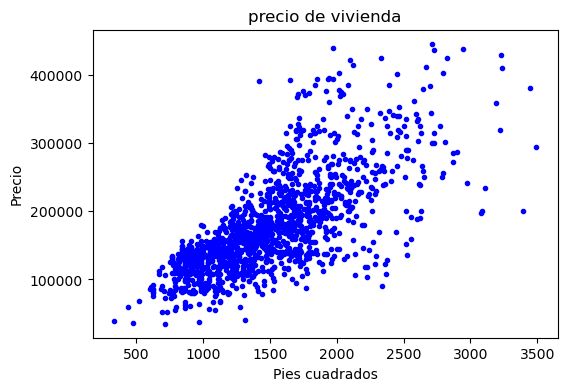

In [109]:
X = df_raw['pies_cuadrados_casa'].values
y = df_raw['precio_dolares'].values
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X, y, color='blue', marker='.')
ax.set_title("precio de vivienda")
ax.set_xlabel("Pies cuadrados")
ax.set_ylabel("Precio")
plt.show()

#### Este es un paso necesario en nuestro caso ya que, al no estar implementando una función de librería, tenemos que normalizar manualmente nuestros datos. De no hacerlo tendríamos errores en los resultados provocados por los ordenes de magnitud.

In [115]:
X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std

y_mean = y.mean()
y_std = y.std()
y_norm = (y - y_mean) / y_std

#### Comenzamos el entrenamiento del modelo con la función que habíamos calculado anteriormente usando nuestros datos normalizados.
Establecemos $\alpha=0.001, n_{epoch}=2500, tolerancia=0.0001$ y verbose=False para no imprimir cada iteración. Solo nos enfocaremos en el modelo de resultado.

In [353]:
random.seed(42)
a, b, errores = regresion_lineal(X=X_norm, y=y_norm, alpha=0.001, n_epoch=2500, tolerancia=0.0001, verbose=False)

#### Desnormalizamos nuestros parámetros obtenidos para que encajen con el modelo de recta de nuestros datos originales.

In [355]:
a_final = (y_std / X_std) * a
b_final = y_mean + y_std * b - a_final * X_mean

#### Estos son los parámetros obtenidos finalmente para a,b

In [357]:
print(a_final, b_final)

107.15926361285412 24041.721861335216


#### Nuestro modelo de recta es
$$y=107.15926361285412x + 24041.721861335216$$

#### Ahora, finalmente graficamos el modelo de recta obtenido junto con nuestro conjunto de datos

In [359]:
fig, ax =  plt.subplots(figsize=(6, 4))
ax.scatter(X, y,  color='blue', marker='.', )
ax.plot(X, [(a_final*x + b_final) for x in X], color='red')
ax.set_title("Precio de vivienda")
ax.set_xlabel("Metros cuadrados")
ax.set_ylabel("Precio en dolares")
plt.show()

#### Podemos ver que el modelo generado es congruente con la distribución del conjunto de datos, sigue la tendencia esperada de acuerdo a la dispersión.

#### Ahora, si nos interesa saber como disminuye la cantidad de error por cada una de las iteraciones podemos hacerlo graficando la función de perdida respecto al número de iteración.

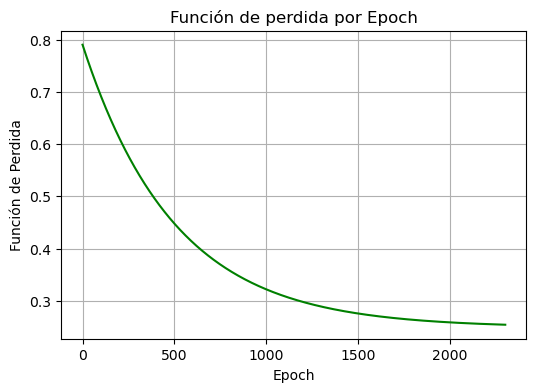

In [361]:
fig, ax =  plt.subplots(figsize=(6, 4))
ax.plot([index for index, value in enumerate(errores)], [error for error in errores], color='green')
ax.set_title("Función de perdida por Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Función de Perdida")
ax.grid(True)
plt.show()